In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/Pokemon.csv",encoding="latin-1",index_col="#")

In [3]:
df

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...
147,Dratini,Dragon,NaN,300,41,64,45,50,50,50,1,False
148,Dragonair,Dragon,NaN,420,61,84,65,70,70,70,2,False
149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,3,False


In [13]:
import numpy as np
import matplotlib.pyplot as plt


def mostrar_radar_pokemon(nombre_pokemon=None, valores1=None, valores2=None):
    
    stats = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
    
        
    if valores1 is not None and valores2 is not None:
        valores1 += [valores1[0]]
        valores2 += [valores2[0]]
    
        num_vars = len(stats)
        angulos = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
        angulos += [angulos[0]]       
    
        fig, ax = plt.subplots(figsize=(5,5), subplot_kw=dict(polar=True))
        ax.plot(angulos, valores1, color='blue', linewidth=2, label='Pokémon 1')
        ax.fill(angulos, valores1, color='blue', alpha=0.25)

        ax.plot(angulos, valores2, color='red', linewidth=2, label='Pokémon 2')
        ax.fill(angulos, valores2, color='red', alpha=0.25)

        ax.set_xticks(angulos[:-1])
        ax.set_xticklabels(stats)
        ax.set_ylim(0, 250)
        ax.set_title("Radar combinado")
        ax.legend()
        plt.show()
        return


    elif nombre_pokemon is not None:
        pokemon = df[df['Name'].str.lower() == nombre_pokemon.lower()]
        if pokemon.empty:
            print(f"No se encontró el Pokémon '{nombre_pokemon}'.")
            

        valores = pokemon[stats].values.flatten().tolist()
        valores += [valores[0]]

        num_vars = len(stats)
        angulos = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
        angulos += [angulos[0]]

        fig, ax = plt.subplots(figsize=(5,5), subplot_kw=dict(polar=True))
        ax.plot(angulos, valores, linewidth=2)
        ax.fill(angulos, valores, alpha=0.25)

        ax.set_xticks(angulos[:-1])
        ax.set_xticklabels(stats)
        ax.set_ylim(0, 250)
        ax.set_title(f"Estadísticas de {pokemon['Name'].values[0]}", size=14)
        plt.show()

        return valores[:-1]

    else:
        print("Faltan parámetros para mostrar el radar.")
        return



In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt


# def mostrar_radar_pokemon(nombre_pokemon1,nombre_pokemon2):
#     pokemon1 = df[df['Name'].str.lower() == nombre_pokemon1.lower()]
#     pokemon2 =  df[df['Name'].str.lower() == nombre_pokemon2.lower()]

#     stats = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
    
#     if pokemon1.empty or pokemon2.empty:
#         print(f"No se encontró el Pokémon.")
#         return
#     valores = nombre_pokemon1[stats].values.flatten().tolist()
#     valores += [valores[0]]

#     valores2 = nombre_pokemon2[stats].values.flatten().tolist()
#     valores2 += [valores2[0]]

#     num_vars = len(stats)
#     angulos = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
#     angulos += [angulos[0]]

#     fig, ax = plt.subplots(figsize=(5,5), subplot_kw=dict(polar=True))
#     ax.plot(angulos, valores, linewidth=2, label=nombre_pokemon1)
#     ax.fill(angulos, valores, alpha=0.25)
#     ax.plot(angulos, valores, linewidth=2, label=nombre_pokemon2)
#     ax.fill(angulos, valores, alpha=0.25)

#     ax.set_xticks(angulos[:-1])
#     ax.set_xticklabels(stats)
#     ax.set_ylim(0, 250)
#     ax.set_title(f"Estadísticas de {nombre_pokemon1} and {nombre_pokemon2}", size=14)
#     plt.show()
   

https://ipywidgets.readthedocs.io/en/8.1.5/examples/Widget%20List.html

In [5]:
from IPython.display import clear_output
import ipywidgets.widgets as w
import json 
import requests
from IPython.display import Image


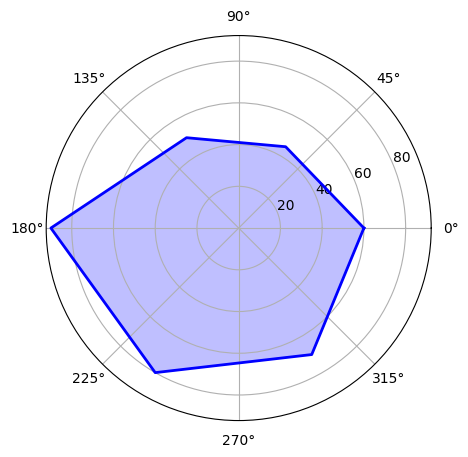

In [14]:
drop1 = w.Dropdown(options=df.loc[:, "Name"].unique())
drop2 = w.Dropdown(options=df.loc[:, "Name"].unique())

out1 = w.Output()
out2 = w.Output()
out3 = w.Output()  

out_imagen1 = w.Output()
out_imagen2 = w.Output()

import requests

valores_pk1 = []
valores_pk2 = []

def mostrar_pokemon1(change):
    global valores_pk1
    if change['type'] == 'change' and change['name'] == 'value':
        nombre_pokemon = change['new']
        
       
        
        with out_imagen1:
            response = requests.get(f"https://pokeapi.co/api/v2/pokemon/{nombre_pokemon}")
            url_imagen = json.loads(response.text)['sprites']['other']['official-artwork']['front_default']
            clear_output(wait=True)
            display(Image(url=url_imagen))
        
        with out1:
            clear_output(wait=True)
            valores_pk1 = mostrar_radar_pokemon(nombre_pokemon)
        
        if valores_pk1 and valores_pk2:
            with out3:
                clear_output(wait=True)
                mostrar_radar_pokemon(None, valores_pk1, valores_pk2)

def mostrar_pokemon2(change):
    global valores_pk2
    if change['type'] == 'change' and change['name'] == 'value':
        nombre_pokemon = change['new']
        
        
        
        with out_imagen2:
            response = requests.get(f"https://pokeapi.co/api/v2/pokemon/{nombre_pokemon.lower()}")
            url_imagen = json.loads(response.text)['sprites']['other']['official-artwork']['front_default']
            clear_output(wait=True)
            display(Image(url=url_imagen))
        
        with out2:
            clear_output(wait=True)
            valores_pk2 = mostrar_radar_pokemon(nombre_pokemon)
        
        if valores_pk1 and valores_pk2:
            with out3:
                clear_output(wait=True)
                mostrar_radar_pokemon(None, valores_pk1, valores_pk2)


drop1.observe(mostrar_pokemon1)
drop2.observe(mostrar_pokemon2)


caja_dropdowns = w.HBox(
    [drop1, drop2],
    layout=w.Layout(width='100%', justify_content='space-between')
)

caja_imagenes = w.HBox(
    [out_imagen1, out_imagen2],
    layout=w.Layout(width='100%', justify_content='space-between')
)

caja_out_lados = w.HBox(
    [out1, out2],
    layout=w.Layout(width='100%', justify_content='space-between')
)

caja_out_centro = w.HBox(
    [out3],
    layout=w.Layout(width='100%', justify_content='center')
)

caja_final = w.VBox(
    [caja_dropdowns, caja_out_lados, caja_out_centro, caja_imagenes,],
    layout=w.Layout(width='100%')
)

display(caja_final)


